1. **shuffle data**
2. **training** (60%), **validation** (a.k.a development) (20%) and **test** (20%). Use the training set to train different models, the validation set to select a model and finally report performance on the test set.

The Linear model does not fit the data very well and is therefore said to have a higher **bias** than the polynomial model.

The polynomial model, on the other hand, suffers from a different problem. The model depends a lot on the choice of training data. If you change the data slightly, the shape of the curve will look very different, and the error will swing widely. Therefore, the model is said to have high **variance**.

For the linear model, the error on this test set is very close to the error he had seen on the training set. In such cases, we say the model has **generalized** well to unseen data.

Teh problem, where the model does very well on the training data but does poorly on the test data is called **overfitting**.

**Total Error = Bias + Variance + Irreducible Error**


![Image](https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png)

Where both training and validation errors are high, is the region of high bias. On the other hand, the region on the right where validation error is high, but training error is low is the region of high variance.

## Training data generation

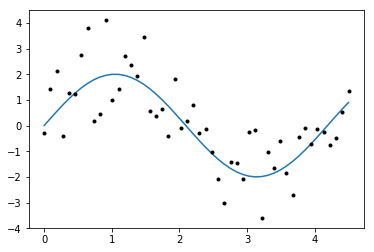

In [14]:
import numpy as np
import pylab as pl

%matplotlib inline

def f(size):
    '''
    Returns a sample with 'size' instances without noise.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    '''
    Returns a sample with 'size' instances.
    '''
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)
    
pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.plot(x, y, 'k.');

## Model fitting

In [13]:
# This illustrates how vander function works:
x1 = np.array([1,2,3])
print (np.vander(x1, 4))

[[ 1  1  1  1]
 [ 8  4  2  1]
 [27  9  3  1]]


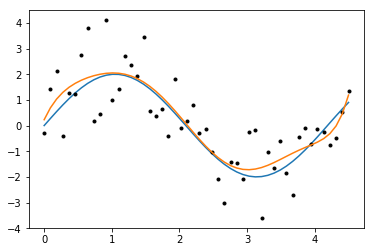

In [16]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

model = fit_polynomial(x, y, 8)
p_y = apply_polynomial(model, x)
pl.plot(f_x, f_y)
pl.plot(x, y, 'k.')
pl.plot(x, p_y);

## Model averaging

The following code generates a set of samples of the same size and fits a poynomial to each sample. Then the average model is calculated. All the models, including the average model, are plotted.

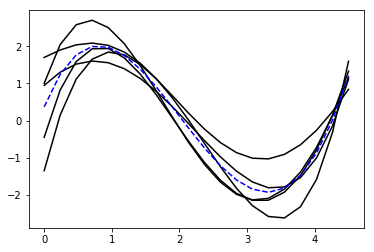

In [21]:
degree = 4
n_samples = 20
n_models = 5
avg_y = np.zeros(n_samples)
for i in np.arange(1, n_models+1):
    (x,y) = sample(n_samples)
    model = fit_polynomial(x, y, degree)
    p_y = apply_polynomial(model, x)
    avg_y = avg_y + p_y
    pl.plot(x, p_y, 'k-')
avg_y = avg_y / n_models
pl.plot(x, avg_y, 'b--');

## Calculating bias and variance

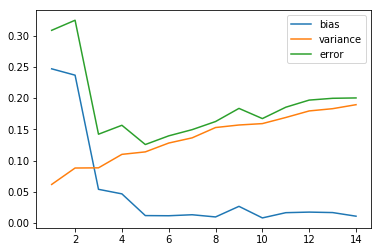

In [25]:
from numpy.linalg import norm
n_samples = 20
f_x, f_y = f(n_samples)
n_models = 100
max_degree = 15
var_vals =[]
bias_vals = []
error_vals = []
for degree in np.arange(1, max_degree):
    avg_y = np.zeros(n_samples)
    models = []
    for i in np.arange(n_models):
        (x,y) = sample(n_samples)
        model = fit_polynomial(x, y, degree)
        p_y = apply_polynomial(model, x)
        avg_y = avg_y + p_y
        models.append(p_y)
    avg_y = avg_y / n_models
    bias_2 = norm(avg_y - f_y)/f_y.size
    bias_vals.append(bias_2)
    variance = 0
    for p_y in models:
        variance += norm(avg_y - p_y)
    variance /= f_y.size * n_models
    var_vals.append(variance)
    error_vals.append(variance + bias_2)
pl.plot(range(1, max_degree), bias_vals, label='bias')
pl.plot(range(1, max_degree), var_vals, label='variance')
pl.plot(range(1, max_degree), error_vals, label='error')
pl.legend();

## Cross Validation

Since in a real setup we don't have access to the real $f$ function. We cannot exactly calculate the error, hoevere we can approximate it using cross validation. We generate to samples, a training sample and a validation sample. The validation sample is use to calculate an estimation of the error.

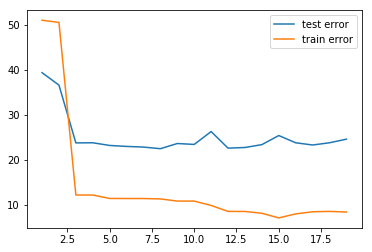

In [28]:
n_samples = 20
# train sample
train_x, train_y = sample(n_samples)
# validation sample
test_x, test_y = sample(n_samples)
max_degree = 20
test_error_vals = []
train_error_vals = []
for degree in np.arange(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(pl.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(pl.norm(test_y - p_y)**2)
pl.plot(range(1, max_degree), test_error_vals, label='test error')
pl.plot(range(1, max_degree), train_error_vals, label='train error')
pl.legend();

## Regularization

Another way to deal with the model complexity is using regularization. A regularizer is a term that penalizes the model complexity and is part of the loss function. the next portion of code shows how the norm of the coefficients of the linear regression model increased when the complexity of the model (polynomial degree) increases.

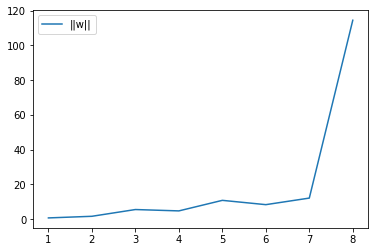

In [36]:
n_samples = 20
train_x, train_y = sample(n_samples)
max_degree = 9
w_norm = []
for degree in np.arange(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    w_norm.append(pl.norm(model.coef_))
pl.plot(range(1, max_degree), w_norm, label='||w||')
pl.legend();

The above result suggests that we can control the complexity by penalizing the norm of the model's weights, $||w||$. This idea is implemented by the Ridge Regression method.